In [67]:
import pandas as pd
board_games = pd.read_csv("board_games.csv")
#remove rows with missing values
board_games = board_games.dropna(axis=0)
#remove rows with no user reviews
board_games = board_games[board_games["users_rated"] > 0]
board_games_original = board_games.copy()
board_games.head()


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d810126a0>]], dtype=object)

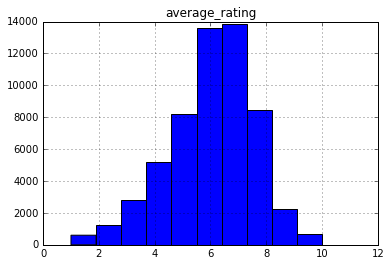

In [68]:
%matplotlib inline

#display distribution of ratings
board_games.hist('average_rating')

In [69]:
board_games['average_rating'].mean()

6.0161128493338492

In [70]:
board_games['average_rating'].std()

1.5788299348332961

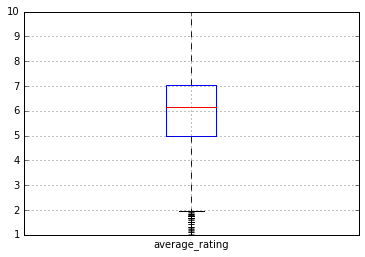

In [71]:
board_games.boxplot('average_rating')

Data is continuous and more or less follows a normal distribution; use mean squared root as error metric.

In [72]:
#K-means clustering, unsupervised learning
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5, random_state=0)

numeric_columns = board_games.columns
numeric_columns = numeric_columns[3:]
board_games = board_games[numeric_columns]


board_games.dtypes

yearpublished           float64
minplayers              float64
maxplayers              float64
playingtime             float64
minplaytime             float64
maxplaytime             float64
minage                  float64
users_rated               int64
average_rating          float64
bayes_average_rating    float64
total_owners              int64
total_traders             int64
total_wanters             int64
total_wishers             int64
total_comments            int64
total_weights             int64
average_weight          float64
dtype: object

In [73]:
kmeans.fit(board_games)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)

In [74]:
labels = kmeans.labels_
print(labels)

[0 0 0 ..., 1 1 1]


In [75]:
game_mean = board_games.apply(np.mean,axis=1)
game_std = board_games.apply(np.std,axis=1)

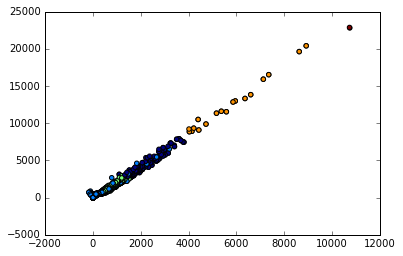

In [76]:
import matplotlib.pyplot as plt

plt.scatter(game_mean,game_std,c=labels)

Most games are similar. There are a few games that show high attribute values.

In [77]:
#show top 10 games with largest attribute values
top_10 = game_mean.nlargest(10)
top_10_list = top_10.index.tolist()
for ind in top_10_list:
    print(board_games_original.loc[ind]["name"])

The Campaign for North Africa
Hammer's Slammers: The Crucible
Catan
Catan
Carcassonne
Carcassonne
Pandemic
Pandemic
Dominion
Dominion


Catan!! I can personally attest to this game's popularity. Having recently discovered this game, I've spent hours into the early mornings trading, building, and settling (the front of the Catan box reads "trade build settle"). Catan is outright addicting. 

Be warned, do not venture into the land of Catan if you value the friendship of your mates.

In [78]:
board_games.corr()["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

High average ratings correlate well with minage (e.g. older players), bayes_average_rating, and average_weight (e.g. a game tends to rate higher if it has more "weight"). Interestingly, the yearpublished column has a relatively strong correlation with average rating; suggesting that more recent games are rated higher than outdated games.

In [79]:
numeric_columns = list(numeric_columns)
numeric_columns.remove('average_rating')
numeric_columns.remove('bayes_average_rating')

In [80]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(board_games[numeric_columns],board_games['average_rating'])
predictions = lr.predict(board_games[numeric_columns])

In [82]:
np.mean((predictions - board_games["average_rating"]) ** 2)

2.0933969758339361

The error rate is close to the standard deviation, indicating our K-means model has weak predictive power. Further investigation of the data and perhaps a better clustering model 